In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train.csv",encoding="utf-8")

In [3]:
df.shape

(8693, 14)

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Imputing Missing Values

## HomePlanet 

In [8]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

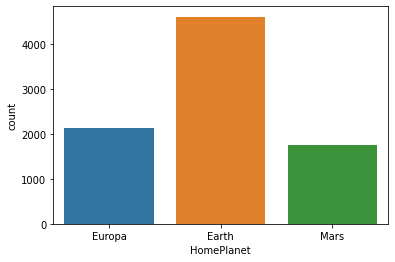

In [9]:
sns.countplot(x ='HomePlanet', data = df)
plt.show()

In [10]:
df.HomePlanet.ffill(axis=0,inplace=True)

## Destination

In [11]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

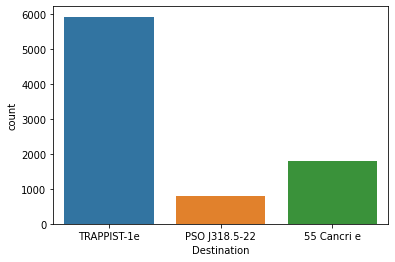

In [12]:
sns.countplot(x ='Destination', data = df)
plt.show()

In [13]:
df.Destination.ffill(axis=0,inplace=True)

## CryoSleep

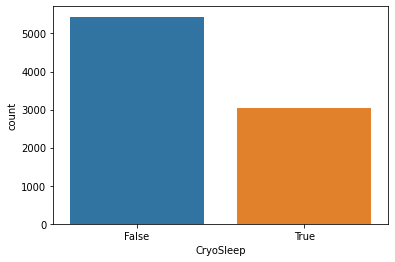

In [14]:
sns.countplot(x ='CryoSleep', data = df)
plt.show()

In [15]:
## Replacing Null values with random value (True or False)
for i,n in enumerate(df.CryoSleep):
    if(n!=True and n!=False):
        val = random.choice([True,False])
        df.loc[i,"CryoSleep"] = val

In [16]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## We can find if the people belong to same family by grouping them by their last name. But here we are dropping the name column

In [17]:
df.drop('Name', axis=1, inplace=True)

## Cabin

In [18]:
Deck = [cab.split("/")[0] if type(cab)!= type(2.33) else np.nan for cab in df.Cabin]
Num = [cab.split("/")[1] if type(cab)!= type(2.33) else np.nan for cab in df.Cabin]
Side = [cab.split("/")[2] if type(cab)!= type(2.33) else np.nan for cab in df.Cabin]

In [19]:
df["Deck"] = Deck
df["Num"] = Num
df["Side"] = Side

In [20]:
df.drop('Cabin', axis=1, inplace=True)

In [21]:
df.Deck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

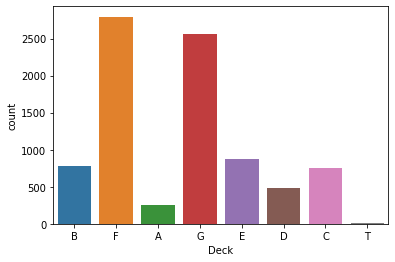

In [22]:
sns.countplot(x ='Deck', data = df)
plt.show()

In [23]:
df.Deck.ffill(axis=0,inplace=True)

## From the analysis we found that the range of seating number is from 0 to 1894. So we are checking and creating a list of numbers that are not assigned to anyone.

## We can say, these are the missing values(nan) so we can randomly assign values from the list

In [24]:
num_ls = list(range(0,1895))
for i in df.Num.unique():
    
    if(type(i) == type(2.23)):
        continue
        
    if int(i) in num_ls:
        num_ls.remove(int(i))

In [25]:
## Replacing Null values with random value (from num_ls)
for i,n in enumerate(df.Num):
    if(type(n) == type(2.23)):
        val = random.choice(num_ls)
        df.loc[i,"Num"] = val

In [26]:
df.Side.unique()

array(['P', 'S', nan], dtype=object)

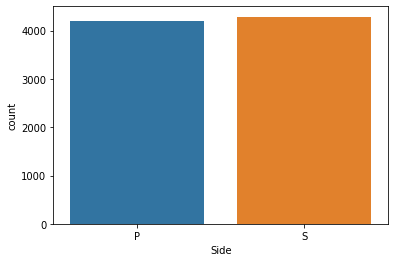

In [27]:
sns.countplot(x ='Side', data = df)
plt.show()

In [28]:
## Replacing Null values with random value (True or False)
for i,n in enumerate(df.Side):
    if(n!=True and n!=False):
        val = random.choice(['P','S'])
        df.loc[i,"Side"] = val

## Analysing RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

## We are imputing all the data with median value for the above columns as all the histogram looks similar. We are taking the median value"

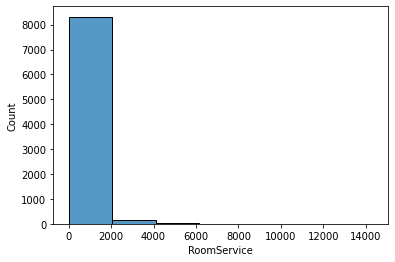

In [29]:
sns.histplot(data = df,x = 'RoomService',bins=7)
plt.show()

In [30]:
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].median())
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median())
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].median())
df['Spa'] = df['Spa'].fillna(df['Spa'].median())
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].median())

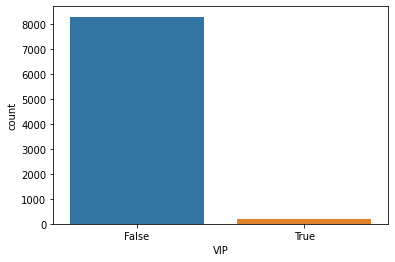

In [31]:
sns.countplot(x ='VIP', data = df)
plt.show()

In [32]:
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [33]:
df["Extra"] = df.RoomService + df.FoodCourt + df.ShoppingMall + df.Spa + df.VRDeck

In [34]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Extra
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,S,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,P,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,P,1091.0


In [35]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Extra
count,8514.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,220.009318,448.434027,169.572300,304.588865,298.261820,1440.866329
std,14.489021,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000
75%,38.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


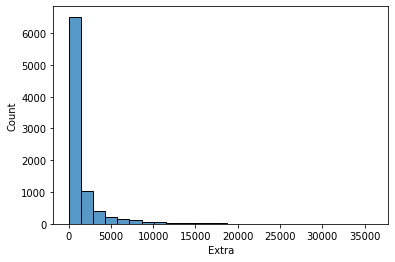

In [36]:
sns.histplot(data = df,x = 'Extra',bins=25)
plt.show()

In [37]:
df_vip = df[df.VIP==True]
df_vip.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Extra
count,198.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,37.449495,464.095477,1756.778894,241.502513,753.065327,1210.035176,4425.477387
std,11.611957,1089.252740,3713.958879,581.285678,1615.732054,2434.363946,5121.300417
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1281.000000
50%,34.000000,0.000000,279.000000,0.000000,35.000000,23.000000,2767.000000
75%,44.000000,525.000000,2103.000000,136.000000,831.500000,1351.000000,6120.500000
max,73.000000,8243.000000,29813.000000,3700.000000,13902.000000,12424.000000,31076.000000


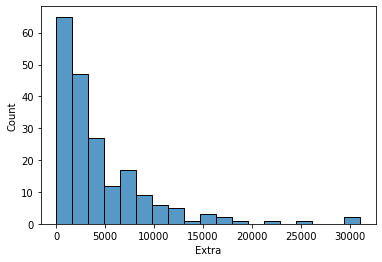

In [38]:
sns.histplot(data = df_vip,x = 'Extra')
plt.show()

In [39]:
df_general = df[df.VIP==False]
df_general.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Extra
count,8119.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000
mean,28.639611,212.686045,417.440598,169.702931,295.197202,276.477868,1371.504644
std,14.469895,638.912787,1490.735182,604.110461,1116.177489,1073.443414,2683.701966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,705.000000
75%,38.000000,36.500000,48.000000,22.000000,46.000000,33.000000,1369.000000
max,79.000000,14327.000000,27071.000000,23492.000000,22408.000000,24133.000000,35987.000000


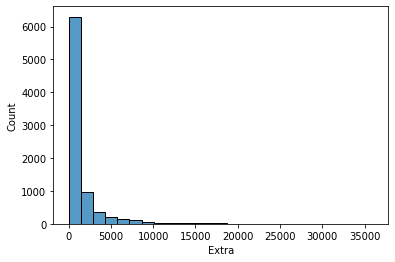

In [40]:
sns.histplot(data = df_general,x = 'Extra',bins=25)
plt.show()

In [41]:
## Replacing Null values
for i,n in enumerate(df.VIP):
    if(type(n) == type(2.23)):
        if(n >= 5000):
            df.loc[i,"VIP"] = True
        else:
            df.loc[i,"VIP"] = False

In [42]:
Group_no = [int(idd.split("_")[1]) for idd in df.PassengerId]

In [43]:
df["Group_no"] = Group_no

## Imputing the age column with most occuring value

In [44]:
df['Age'] = df['Age'].groupby(df['Group_no']).apply(lambda x: x.fillna(x.mean()))

In [45]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Extra', axis=1, inplace=True)

In [46]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
Group_no        0
dtype: int64

## Converting categorical variables to numeric

In [47]:
df.CryoSleep = df.CryoSleep.map({True: 1, False: 0})
df.VIP = df.VIP.map({True: 1, False: 0})
df.Transported = df.Transported.map({True: 1, False: 0})

In [48]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group_no
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,S,1
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,P,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,1
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,2
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,P,1


In [49]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [50]:
enc = OneHotEncoder(drop='first')
arrival = enc.fit_transform(df.HomePlanet.values.reshape(-1, 1)).toarray()
arrival = pd.DataFrame(arrival,columns=['Earth','Mars'])

In [51]:
df = pd.concat([df,arrival],axis=1)

In [52]:
df.drop('HomePlanet', axis=1, inplace=True)

In [53]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [54]:
enc2 = OneHotEncoder(drop='first')
destination = enc2.fit_transform(df.Destination.values.reshape(-1, 1)).toarray()
destination = pd.DataFrame(destination,columns=['D2','D3'])

df = pd.concat([df,destination],axis=1)

df.drop('Destination', axis=1, inplace=True)

In [55]:
df.Side.unique()

array(['S', 'P'], dtype=object)

In [56]:
enc3 = OneHotEncoder(drop='first')
side = enc3.fit_transform(df.Side.values.reshape(-1, 1)).toarray()
side = pd.DataFrame(side,columns=['S'])

df = pd.concat([df,side],axis=1)

df.drop('Side', axis=1, inplace=True)

In [57]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Group_no,Earth,Mars,D2,D3,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,1,1.0,0.0,0.0,1.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,1,0.0,0.0,0.0,1.0,0.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,1,1.0,0.0,0.0,1.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,2,1.0,0.0,0.0,1.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,1,0.0,0.0,0.0,1.0,0.0


In [58]:
df.Deck.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

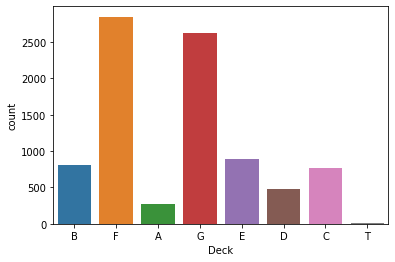

In [59]:
sns.countplot(x ='Deck', data = df)
plt.show()

In [60]:
## Applying Mean encoding
mean_encoded = df.groupby("Deck")["Transported"].mean()
df["Deck"] = df["Deck"].map(dict(mean_encoded))

In [61]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Group_no,Earth,Mars,D2,D3,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.729763,0,1,1.0,0.0,0.0,1.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0.439059,0,1,0.0,0.0,0.0,1.0,0.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.500000,0,1,1.0,0.0,0.0,1.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.500000,0,2,1.0,0.0,0.0,1.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0.439059,1,1,0.0,0.0,0.0,1.0,0.0


In [62]:
df.Group_no.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

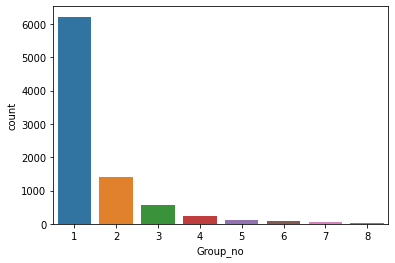

In [63]:
sns.countplot(x ='Group_no', data = df)
plt.show()

In [64]:
## Applying Mean encoding
mean_encoded = df.groupby("Group_no")["Transported"].mean()
df["Group_no"] = df["Group_no"].map(dict(mean_encoded))

In [65]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Group_no,Earth,Mars,D2,D3,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.729763,0,0.475953,1.0,0.0,0.0,1.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0.439059,0,0.475953,0.0,0.0,0.0,1.0,0.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.500000,0,0.475953,1.0,0.0,0.0,1.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.500000,0,0.558782,1.0,0.0,0.0,1.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0.439059,1,0.475953,0.0,0.0,0.0,1.0,0.0


## Scaling the data - StandardScalar

In [79]:
scaler = StandardScaler()
df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = scaler.fit_transform(df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [80]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Group_no,Earth,Mars,D2,D3,S
0,0,0.709329,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,0.729763,0,0.475953,1.0,0.0,0.0,1.0,1.0
1,0,-0.336601,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,0.439059,0,0.475953,0.0,0.0,0.0,1.0,0.0
2,0,2.034174,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0.500000,0,0.475953,1.0,0.0,0.0,1.0,1.0
3,0,0.290957,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0.500000,0,0.558782,1.0,0.0,0.0,1.0,1.0
4,0,-0.894430,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,0.439059,1,0.475953,0.0,0.0,0.0,1.0,0.0


## Modelling Classification Model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [85]:
X = df.loc[:, df.columns != 'Transported']
y = df.Transported

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=223, stratify=y)

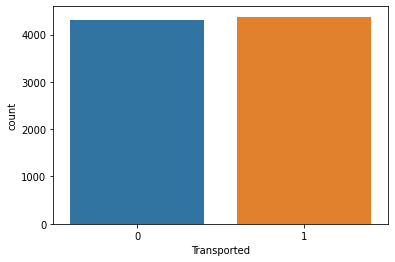

In [89]:
sns.countplot(x ='Transported', data = df)
plt.show()

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/sribalaji21/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
model.score(X_train, y_train)

0.7832489645651174

In [94]:
model.score(X_test, y_test)

0.7796688132474701

In [97]:
## Predicting
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.7796688132474701

In [103]:
confusion_matrix(y_test, predict)/len(y_test)

array([[0.38040478, 0.11591536],
       [0.10441582, 0.39926403]])